## Clustering analysis on an attention span over 110 days

### Exploring Clustering algorithms

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# use data based on a focused study
import os
path = '/Users/smallpandas/focus_study'
df_raw = pd.read_csv(path + os.sep + 'focus_timev2.csv', index_col=0)
display(df_raw.head())
print(df_raw.info())

,task,focused_mins,days,daily_sum_mins,datetime,notes
0,courses,60.0,1.0,129.0,2020-09-01,'
1,coding,16.0,1.0,129.0,2020-09-01,'
2,coding,19.0,1.0,129.0,2020-09-01,'
3,coding,34.0,1.0,129.0,2020-09-01,'
4,courses,18.0,2.0,122.0,2020-09-02,'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 598
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   task            599 non-null    object 
 1   focused_mins    599 non-null    float64
 2   days            599 non-null    float64
 3   daily_sum_mins  599 non-null    float64
 4   datetime        599 non-null    object 
 5   notes           598 non-null    object 
dtypes: float64(3), object(3)
memory usage: 32.8+ KB
None


In [3]:
# Make images less blurry on Jupyter.
%config InlineBackend.figure_format = 'retina'
sns.set()
sns.set_palette('colorblind')
sns.set_style('ticks')
sns.set_context('talk')
plt.rcParams['figure.figsize'] = [11.7*0.6, 8.27*0.6]

### linkage and fcluster
#### linkage: Ward method

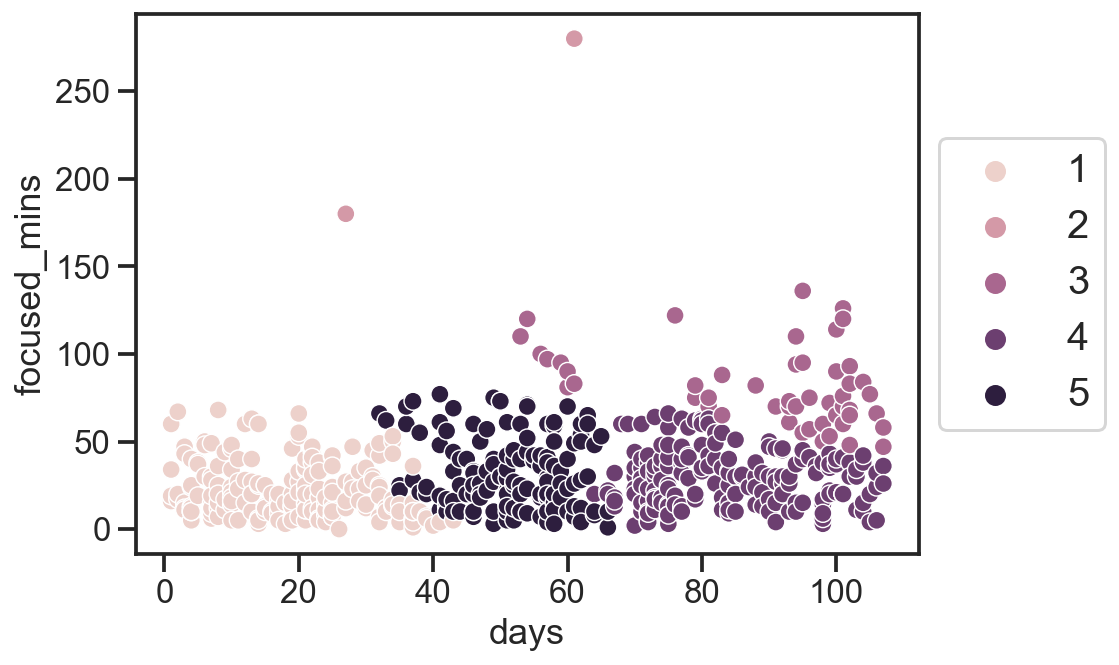

In [9]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

df = df_raw[['days', 'focused_mins']]
# print(df.head())

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')
num_cluster = 5
# Generate cluster labels
lab = fcluster(Z, num_cluster, criterion='maxclust')
df2 = df.copy()
df2['cluster_labels'] = lab

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df2, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

#### linkage: Single method

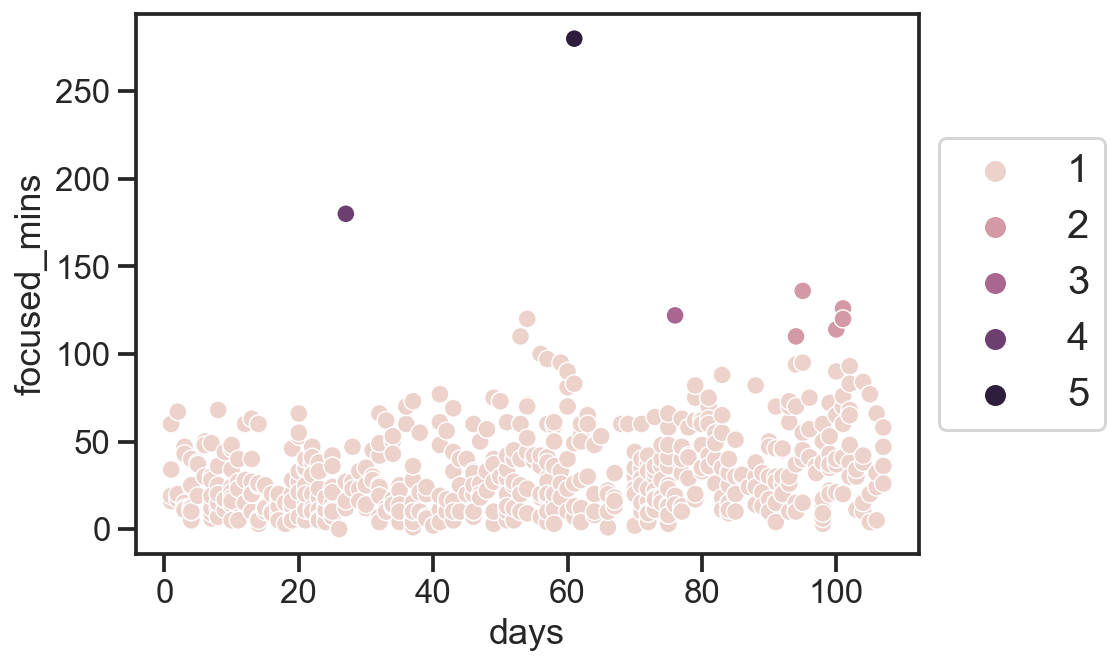

In [13]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

df = df_raw[['days', 'focused_mins']]
# print(df.head())

# Use the linkage() function to compute distance
distance_matrix = linkage(df, method = 'single', metric = 'euclidean')
num_cluster = 5
# Generate cluster labels
lab = fcluster(distance_matrix, num_cluster, criterion='maxclust')
df2 = df.copy()
df2['cluster_labels'] = lab

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df2, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

#### linkage: Complete method

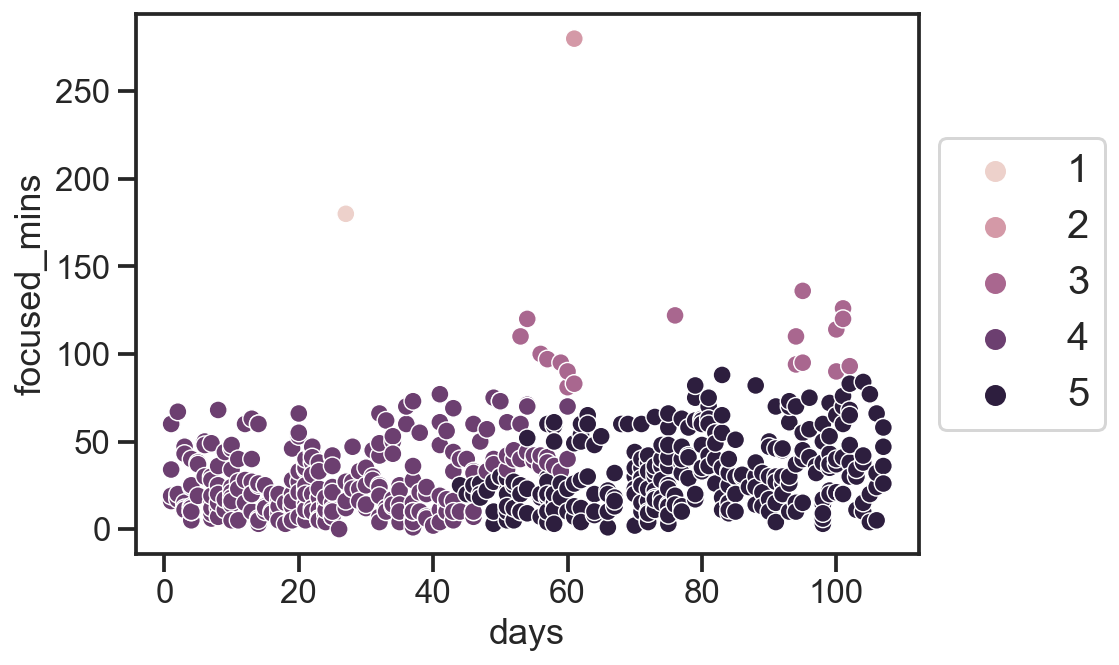

In [14]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

df = df_raw[['days', 'focused_mins']]
# print(df.head())

# Use the linkage() function to compute distance
distance_matrix = linkage(df, method = 'complete', metric = 'euclidean')
num_cluster = 5
# Generate cluster labels
lab = fcluster(distance_matrix, num_cluster, criterion='maxclust')
df2 = df.copy()
df2['cluster_labels'] = lab

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df2, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

#### Creating a dendrogram

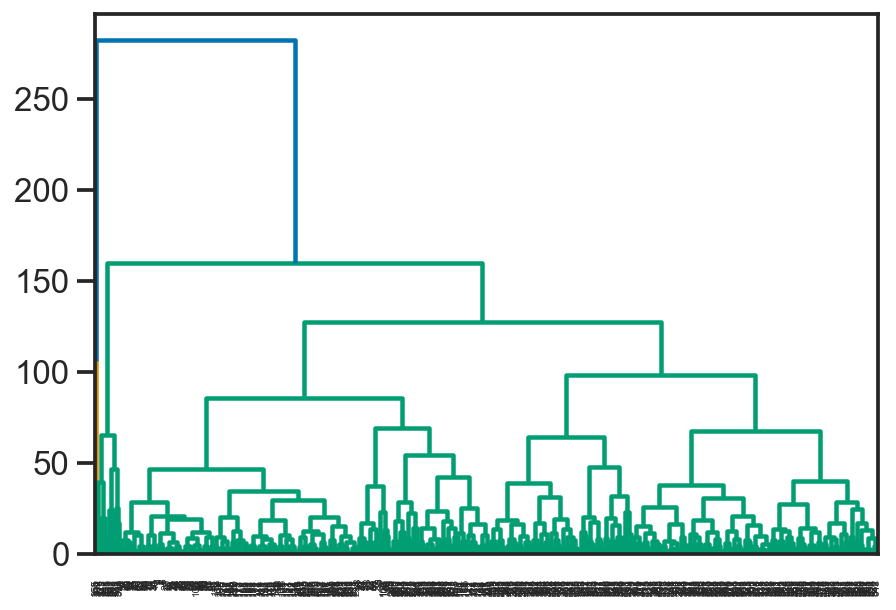

In [15]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
dn = dendrogram(distance_matrix)

# Display the dendogram
plt.show()

### kmeans, vq

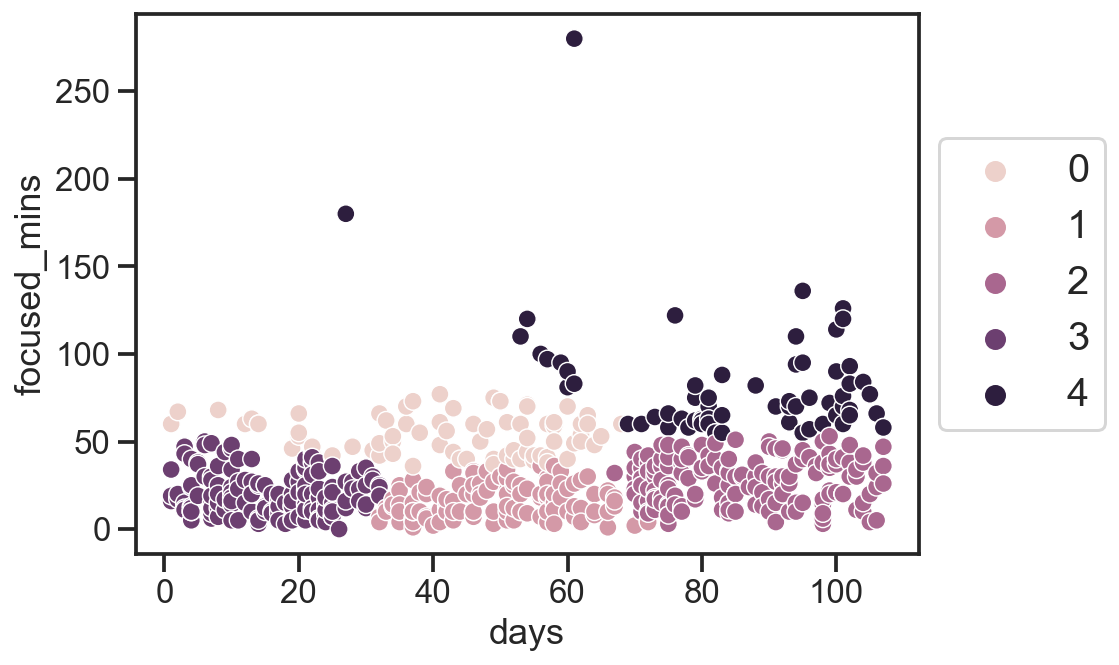

In [16]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids, _ = kmeans(df, num_cluster)

# Assign cluster labels
df_km = df.copy()
df_km['cluster_labels'], _ = vq(df, centroids)

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df_km, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

So kmeans and linkage-ward method yield different clustering results.

### Would scaling data make a difference for the dataset here?

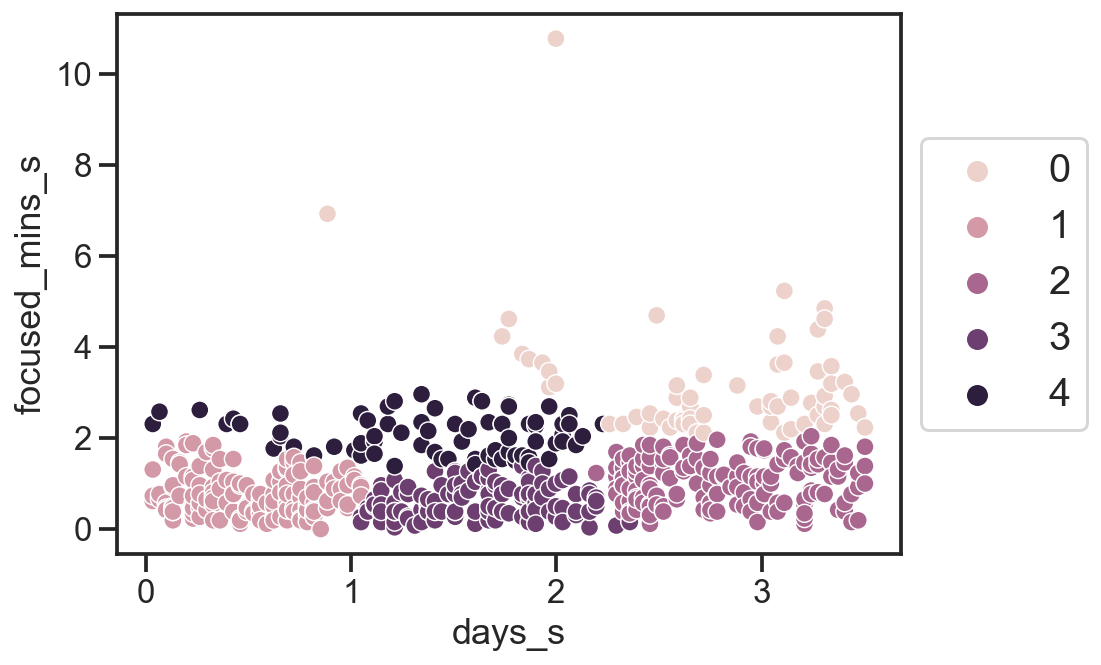

In [11]:
# Import the whiten function
from scipy.cluster.vq import whiten
df_km['days_s'] = whiten(df_km['days'])
df_km['focused_mins_s'] = whiten(df_km['focused_mins'])

# Compute cluster centers
centroids, _ = kmeans(df_km, num_cluster)

# Assign cluster labels
df_km_s = df_km.copy()
df_km_s['cluster_labels_s'], _ = vq(df_km, centroids)

# Plot the clustering result
g = sns.scatterplot(x='days_s', y='focused_mins_s', hue='cluster_labels_s', data=df_km_s, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

It didn't make a difference. The original data were on similar scale already!

How to decide the number of clusters ? 

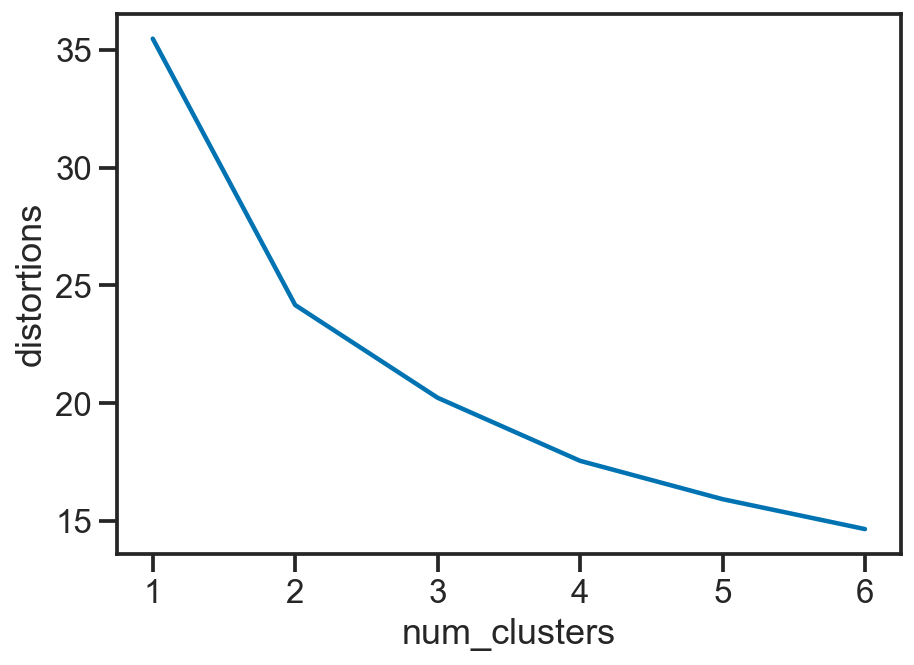

In [17]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df_km[['days', 'focused_mins']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Do you think there is an elbow? Look like 2 clusters are the best ?  Or should we conclude that there is no well defined elbow in this plot?

### Impact of seeds on distinct clusters
(k-means clustering algorithm uses a randomly generated seed to determine the starting centroids of the clusters. That is why the seed will have an impact on the final clusters) 

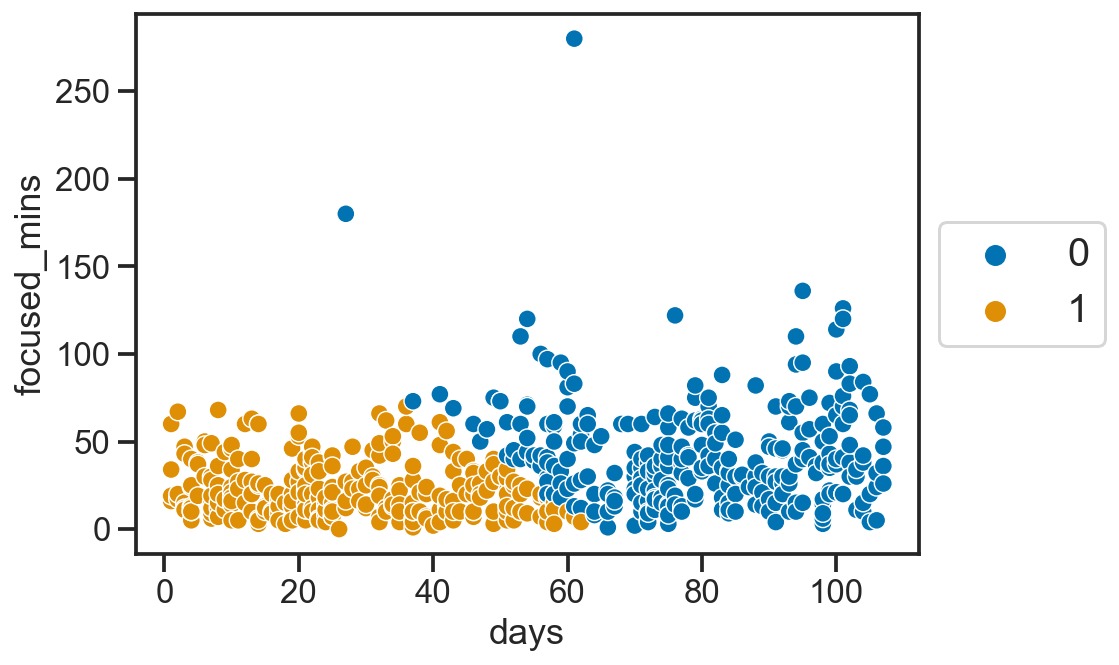

In [18]:
# Import random class
from numpy import random

# Initialize seed
random.seed(10)

# Run kmeans clustering
cluster_centers, distortion = kmeans(df_km[['days', 'focused_mins']], 2)
df_km_c = df_km.copy()
df_km_c['cluster_labels'], distortion_list = vq(df_km[['days', 'focused_mins']], cluster_centers)

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df_km_c, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

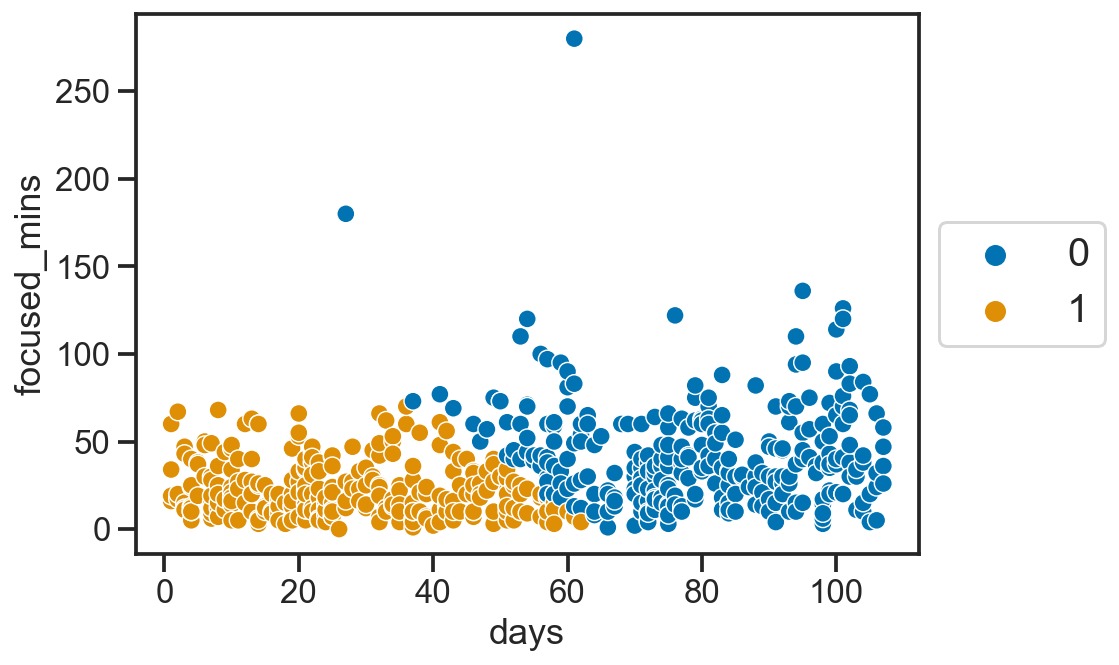

In [19]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(df_km[['days', 'focused_mins']], 2)
df_km_c = df_km.copy()
df_km_c['cluster_labels'], distortion_list = vq(df_km[['days', 'focused_mins']], cluster_centers)

# Plot the clustering result
g = sns.scatterplot(x='days', y='focused_mins', hue='cluster_labels', data=df_km_c, 
                    alpha=1)
g.legend(loc='center left', bbox_to_anchor=(1., 0.5), ncol=1, prop={'size': 20})
plt.show()

Ok,  the plots have not changed after changing the seed! The clusters are well-defined.
See EDA notes.